In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
def saturation(val): #클램핑함수
  if val> 255:
    return 255
  elif val < 0:
    return 0
  else:
    return val

(256, 256, 3)
(256, 256)


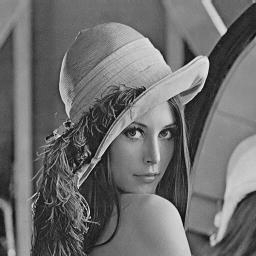

In [3]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

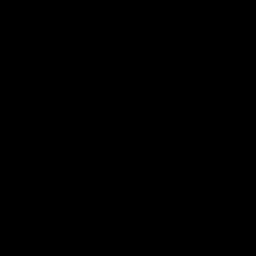

In [17]:
outimg = np.zeros(gimg1.shape, dtype=np.uint8)
cv2_imshow(outimg)

전방향

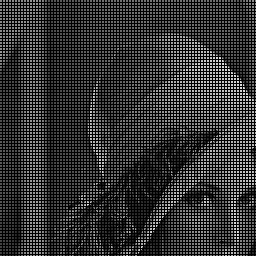

In [21]:
scaling =1.5
outimg = np.zeros(gimg1.shape, dtype=np.uint8)
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    y = int(h*scaling)
    x = int(w*scaling)
    if y < gimg1.shape[0] and x < gimg1.shape[1]:
      outimg[y,x] = gimg1[h,w]

cv2_imshow(outimg)

역방향

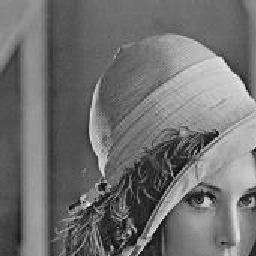

In [23]:
scaling =1.5
outimg = np.zeros(gimg1.shape, dtype=np.uint8)
for y in range(gimg1.shape[0]):
  for x in range(gimg1.shape[1]):
    h = int(y/scaling)
    w = int(x/scaling)
    if h < gimg1.shape[0] and w < gimg1.shape[1]:
      outimg[y,x] = gimg1[h,w]

cv2_imshow(outimg)

양선형 보간법

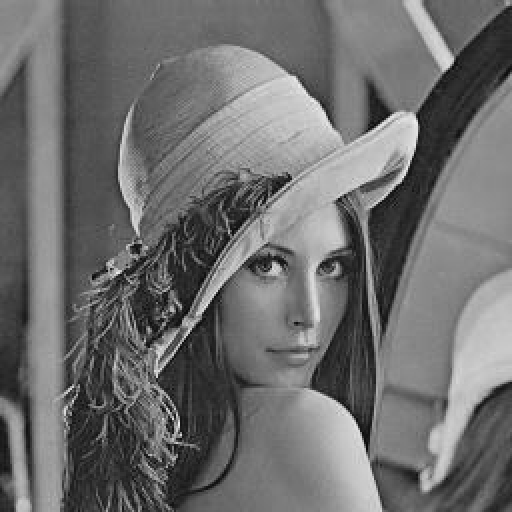

In [25]:
#최근접 이웃 보간법
outimg2 = cv2.resize(gimg1, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
cv2_imshow(outimg2)

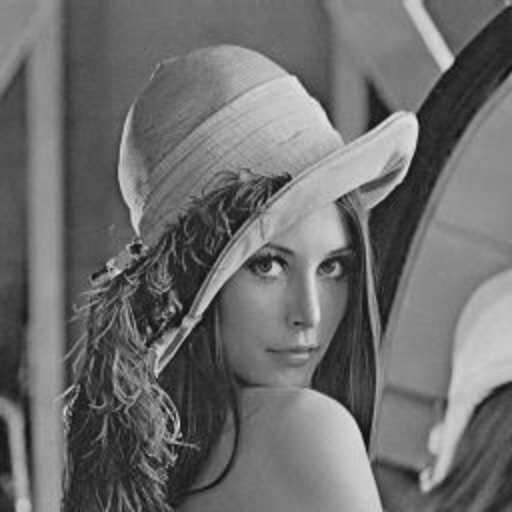

In [30]:
#양선형 보간법
outimg2 = cv2.resize(gimg1, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
cv2_imshow(outimg2)

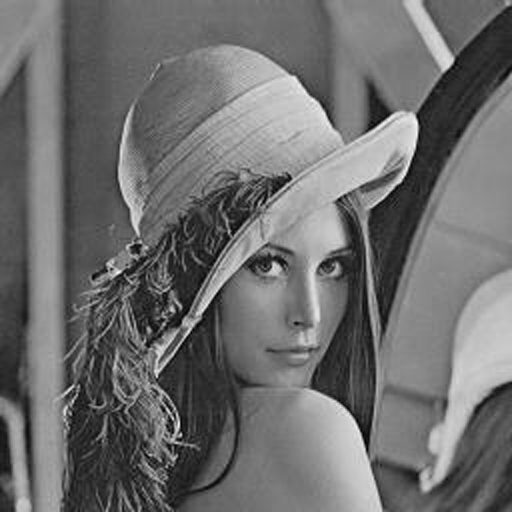

In [31]:
#큐빅 3차 회선 보간법
outimg2 = cv2.resize(gimg1, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
cv2_imshow(outimg2)

(256, 256, 3)
(256, 256)


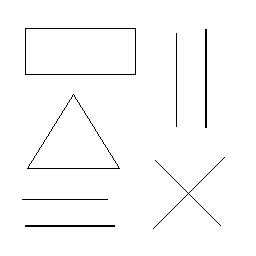

In [33]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/shrinking.bmp')
print(img.shape)
gimg2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg2)

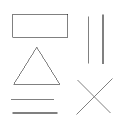

In [38]:
#outimg3 = cv2.resize(gimg1, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_NEAREST)
outimg3 = cv2.resize(gimg1, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
#outimg3 = cv2.resize(gimg1, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_CUBIC)
cv2_imshow(outimg3)

필터링 후 축소

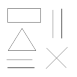

In [41]:
blur = cv2.GaussianBlur(gimg2,(5,5),0)

outimg4 = cv2.resize(blur, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
#outimg3 = cv2.resize(gimg1, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_CUBIC)
cv2_imshow(outimg4)

영상회전

(256, 256, 3)
(256, 256)


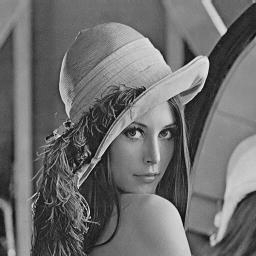

In [42]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/lena256.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
#plt.imshow(gimg1, cmap='gray')
cv2_imshow(gimg1)

In [43]:
height, width = gimg1.shape
print(height, width)

256 256


In [46]:
M = cv2.getRotationMatrix2D((width/2.0 , height / 2.0),45,1)
print(M)

[[  0.70710678   0.70710678 -53.01933598]
 [ -0.70710678   0.70710678 128.        ]]


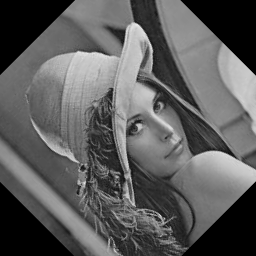

In [47]:
outimg5 = cv2.warpAffine(gimg1,M,(width,height))
cv2_imshow(outimg5)

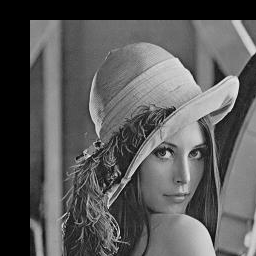

In [49]:
M2 = np.float32([[1,0,30],[0,1,20]])
outimg6 = cv2.warpAffine(gimg1,M2,(width,height))
cv2_imshow(outimg6)